# Murderer or Victim?

### Problem statements (objectives):
    - What are the chances that you are either a murderer or a victim depending on the set variables and attributes
    - What are the characteristics of murderers or victims
    - What kind of relationship is between the data
    - Identify the serial killer activity per location and year
    - Identify interasting relationships (correlation) between different variables later to be used for building a 
        decision tree and clustering
        
        
    - AUDIENCElike you are working for someone 
    - how safe is your state
    - how do you sell it to police (to sell this product)
    - location wise perp/vic
    - construction company 
    - age groups --> can ew improve education (can we improve) 
    - propose to state gov. 
    - whats the solution if proposal
    - yes/npo 
    - 3 departments (wants bigger university, construc community, police) by show of hands what will you support 
    - each have 3 minutes --> competition 
    - write it as a storyline (question biggest - safedt location..., more people in university)
    - how to get to that conclusion 
    - another notebook for presentation (asking for money) --> monopoly --> collect 
    - who cares? apply it to specific question --> put it to them hands to care (hook in)
    - questions --> make you point 
    - pass the hat to collect the momey --> moderator (anonymous voting) --> online 
    - whats the million dollar question ? 3 questions 
    - real comptetitions --> attacking each other fighting over million dollars (or live debate --> atack back your project is stupid can prove it)
    - just insight 

# GET CORRELATION TO NOT SOLVED AND UNKNOWN VALUES

### Glossary

Our main homocide dataset consists of 24 columns of 638,454 rows. Features are explained in detail in the getting to know the data section. The following features (variables) are integer based and will be used for calculations:
    1. The record ID simply signifies the number of rows)
    2. Year and month data was collected from 1980-2014 (depending on location)
    3. Incident are the case(s) for which these other features were collected (e.g. 1 incident for year 2014 in CT etc.)
    4. Victim Age
    5. Perpetrator Age
    6. Victim Count and Perpertrator Count starting with zero and maximum value of 10 (the original dataset) tells us about        the number of victims and perpetrators involved in a particular incident.  
    
The folowing columns are an object data type:
    1. Agency code is six-digit alphanumeric code used to classify accounts by the federal or non-federal agency. 
        The alpha part of the code is the parent or major agency. The numeric part of the code identifies the sub-agency.
    2. Agency name
    3. Agency type 
    4. City, state
    5. Victim and perpetrator sex, ethnicity, race, relationship
    6. Crime type
        - Murder or Mansloughter
        - Mansloughter by negligence
    7. Crime solved
    8. Weapon
    
### Data Source and Content

Source: https://www.kaggle.com/murderaccountability/homicide-reports

The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

Acknowledgements

The data was compiled and made available by the Murder Accountability Project, founded by Thomas Hargrove.

# Findings

    - Starting with 638453 of observations after removing all missing or uknown data we end up with 151243.
        Which is concerning as 497,210 incidents do not have all the information. 
    - There were 190,282 unsolved crimes in the original dataset. Even if we say that these are the crimes 
    we do not have complete data on it still leaves 306,928 without complete information. 

    - In 2014 not cleaned data: Perpetrator Count 17816, Victim Count 16396

    - FBI CITED: In 2014, the estimated number of murders in the nation was 14,249. 
        There were more perpetrators than victims. 

    - In 2013 from our data: 
        - Perpetrator Count    17930
        - Victim Count         16721

    - In the 2013 FBI reported 14,196 murders. 
    
### Interesting question:
    - we would be interested to see the growth rate per year and/or state. 
    - This numbers match almost the same as to online resources meaning that reporting is the problem. Why?
    - Based on the relationship how far/less likely are you to be a victim. 
    - detect serial murderer activity
    - Fill in the gaps with mashine learning classification on the clean data 
    - Who is the most likely a murderer based on the relationship (reverse relationship role)
    
Reason why reporting might not as good:

The victims survey is an important tool for researchers because a significant percentage of crimes are never reported to police and so are not counted in other measures like the FBI’s Uniform Crime Reporting program. By asking nearly 225,000 people if they’ve been victims of crime and whether they reported it to the police, the survey tries to fill in the gaps of other measures that can undercount crimes in communities where vulnerable populations do not go to the police for help as often.

The U.S. has two major data collection programs, the Uniform Crime Reports from the FBI and the National Crime Victimization Survey from the Bureau of Justice Statistics. However, the U.S. has no comprehensive infrastructure to monitor crime trends and report the information to related parties such as law enforcement.[2]

while domestic violence, domestic child abuse and sexual offences are frequently significantly under-reported because of the intimate relationships involved, embarrassment and other factors that make it difficult for the victim to make a report.

http://theconversation.com/why-the-us-needs-better-crime-reporting-statistics-104731

## 1. Data exploration and finding errors

The intention here is to get to know the data and identify errors column by column. 

In [1]:
# importing libraries

import pandas as pd # importing, data manipulation, subsetting
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the csv file 
data = pd.read_csv("US HOMOCIDE REPORT.csv")

# diplay first 3 and last 3 rows of the dataset
head = data.head(3)
tail = data.tail(3)

# concatonate it together 
pd.concat([head,tail])

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,638454,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


In [15]:
# data inspection
# from our output and warning we see that "Perpetrator Age" column is considered and object while it should be an integer
# no-null values found yet 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [4]:
# no null values found
# that does not mean there are no mistakes 
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [5]:
# unique values for agency code
# Starts with a state abbreviation and the code to state/federal agency
data["Agency Code"].unique()

array(['AK00101', 'AK00103', 'AK00106', ..., 'WA01750', 'WA02705',
       'WVWSP65'], dtype=object)

Text(0.5, 1, 'Top 5 Value Counts per Agency Code')

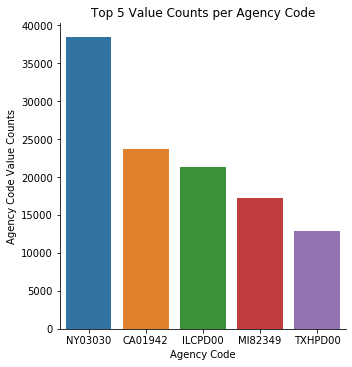

In [11]:
# value counts for agency code
# New York, California, and Ilionios agencys are observed the most 
d1 = data["Agency Code"].value_counts().reset_index().head()
d1.columns = ["Agency Code", "Agency Code Value Counts"]
d11 = sns.catplot(x="Agency Code",y="Agency Code Value Counts", kind="bar", 
            data=d1)
plt.title('Top 5 Value Counts per Agency Code')

In [7]:
# 2/3 of the crimes are solved
data["Crime Solved"].value_counts()

Yes    448172
No     190282
Name: Crime Solved, dtype: int64

In [16]:
# unique values for agency names
data["Agency Name"].unique()

In [9]:
# New York, LA, and Chicago agency are observed the most
data["Agency Name"].value_counts()

New York                             38416
Los Angeles                          29007
Chicago                              21331
Detroit                              17206
Houston                              13046
                                     ...  
Indian Shores                            1
Coloma Township                          1
Troutman                                 1
Highway Patrol: Greenville County        1
Higginsville                             1
Name: Agency Name, Length: 9216, dtype: int64

In [10]:
# unique values for agency type
data["Agency Type"].unique()

array(['Municipal Police', 'County Police', 'State Police', 'Sheriff',
       'Special Police', 'Regional Police', 'Tribal Police'], dtype=object)

In [11]:
# unique values for agency type
# almost all murder incidences are handled by the municipal police 
data["Agency Type"].value_counts()

Municipal Police    493026
Sheriff             105322
County Police        22693
State Police         14235
Special Police        2889
Regional Police        235
Tribal Police           54
Name: Agency Type, dtype: int64

In [12]:
# unique values for the city
data["City"].unique()

array(['Anchorage', 'Juneau', 'Nome', ..., 'Rooks', 'McCone', 'Antelope'],
      dtype=object)

In [13]:
# unique values for city
# We see small cities like Cook, Wayne and Harrison with large amounts of incident reports
# i.e. Wayne has a popolation of about 2,000
data["City"].value_counts()

Los Angeles              44511
New York                 38431
Cook                     22383
Wayne                    19904
Harris                   16331
                         ...  
Carlisle                     1
Powder River                 1
Skagway-Hoonah-Angoon        1
Foard                        1
Sanborn                      1
Name: City, Length: 1782, dtype: int64

In [14]:
# unique values for the state
state_count = data["State"].value_counts()
state_count

California              99783
Texas                   62095
New York                49268
Florida                 37164
Michigan                28448
Illinois                25871
Pennsylvania            24236
Georgia                 21088
North Carolina          20390
Louisiana               19629
Ohio                    19158
Maryland                17312
Virginia                15520
Tennessee               14930
Missouri                14832
New Jersey              14132
Arizona                 12871
South Carolina          11698
Indiana                 11463
Alabama                 11376
Oklahoma                 8809
Washington               7815
District of Columbia     7115
Arkansas                 6947
Colorado                 6593
Kentucky                 6554
Mississippi              6546
Wisconsin                6191
Massachusetts            6036
Nevada                   5553
Connecticut              4896
New Mexico               4272
Oregon                   4217
Minnesota 

In [15]:
# District of Columbia is included
# We will treat it as a state
state_count.count()

51

In [16]:
# unique values for state
# we see that there is a positive skew 
state_count.describe()

count       51.000000
mean     12518.705882
std      17686.520705
min        308.000000
25%       1683.000000
50%       6554.000000
75%      15225.000000
max      99783.000000
Name: State, dtype: float64

In [17]:
# unique values for the years
# 35 years worth of data
data["Year"].value_counts().count()

35

In [18]:
# unique values for month
# 12 months
data["Month"].value_counts().count()

12

In [19]:
# unique values for the incident
# The incident is a count. If only 1 incident happened e.g. in 1980 in Alabama, white male in Birmimham counts as 1
# if 2 then the new observation is counted as 2. The previous 1 is still counted as 1. 
# Meaning that we will need to get rid of these values so we do not overcount the incidences 
data["Incident"].value_counts()

1      265528
2       71779
3       39236
4       27113
5       20658
        ...  
784        16
783        16
782        16
781        16
0          16
Name: Incident, Length: 1000, dtype: int64

In [20]:
# unique values for crime type
    # Involuntary manslaughter usually refers to an unintentional killing that results from criminal
    # negligence or recklessness, or from committing an offense such as a DUI.
    # It differs from voluntary manslaughter in that the victim's death is unintended.
data["Crime Type"].value_counts()

Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: Crime Type, dtype: int64

In [21]:
# unique values for victim sex
# the majority of victims are reported male
data["Victim Sex"].value_counts()

Male       494125
Female     143345
Unknown       984
Name: Victim Sex, dtype: int64

In [22]:
# unique values for victim age
# victims are mostly in their 20's
data["Victim Age"].value_counts()

22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 101, dtype: int64

In [23]:
# unique values for agency type
# does the age 0 represent killing of newborns? if so how many of such reports?
data["Victim Age"].describe()

count    638454.000000
mean         35.033512
std          41.628306
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max         998.000000
Name: Victim Age, dtype: float64

In [24]:
# over 35 years 8444 victims were age 0 
data[data["Victim Age"]==0].count()

Record ID                8444
Agency Code              8444
Agency Name              8444
Agency Type              8444
City                     8444
State                    8444
Year                     8444
Month                    8444
Incident                 8444
Crime Type               8444
Crime Solved             8444
Victim Sex               8444
Victim Age               8444
Victim Race              8444
Victim Ethnicity         8444
Perpetrator Sex          8444
Perpetrator Age          8444
Perpetrator Race         8444
Perpetrator Ethnicity    8444
Relationship             8444
Weapon                   8444
Victim Count             8444
Perpetrator Count        8444
Record Source            8444
dtype: int64

In [25]:
# we notice there is mistake/typo
# no way someone is 988 years old and if so, it might have been time 
data["Victim Age"].max()

998

In [26]:
# unique values for victim race
# mostly white
# considering the african-americans account for 13% of US population the results are very close
data["Victim Race"].value_counts()

White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: Victim Race, dtype: int64

In [27]:
# unique values for victim ethnicity
data["Victim Ethnicity"].value_counts()

Unknown         368303
Not Hispanic    197499
Hispanic         72652
Name: Victim Ethnicity, dtype: int64

In [28]:
# unique values for victim count
# Lots of missing values (0)
# numbers range from 0 - 10. 
# we assume 0 values mean 1 and so on (+1)
data["Victim Count"].value_counts()

0     586059
1      38750
2       8156
3       2847
4       1084
5        510
9        290
6        286
7        168
10       160
8        144
Name: Victim Count, dtype: int64

In [29]:
# unique values for perpetrator age
# Lots of missing values (0)
# limit to age has to be set
# if we remember from before 190282 cases were not solved. What if this corresponds do that?
# lets check
data["Perpetrator Age"].value_counts()

0     211079
20     21158
19     19807
21     18509
18     18477
       ...  
10         1
88         1
           1
93         1
6          1
Name: Perpetrator Age, Length: 191, dtype: int64

In [30]:
# This proves our point
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Crime Solved"]=="No") & (data["Perpetrator Age"]==0)].count()

Record ID                184980
Agency Code              184980
Agency Name              184980
Agency Type              184980
City                     184980
State                    184980
Year                     184980
Month                    184980
Incident                 184980
Crime Type               184980
Crime Solved             184980
Victim Sex               184980
Victim Age               184980
Victim Race              184980
Victim Ethnicity         184980
Perpetrator Sex          184980
Perpetrator Age          184980
Perpetrator Race         184980
Perpetrator Ethnicity    184980
Relationship             184980
Weapon                   184980
Victim Count             184980
Perpetrator Count        184980
Record Source            184980
dtype: int64

In [5]:
data[(data["Crime Solved"]=="No") & (data["Relationship"]=='Unknown')].count()

Record ID                178121
Agency Code              178121
Agency Name              178121
Agency Type              178121
City                     178121
State                    178121
Year                     178121
Month                    178121
Incident                 178121
Crime Type               178121
Crime Solved             178121
Victim Sex               178121
Victim Age               178121
Victim Race              178121
Victim Ethnicity         178121
Perpetrator Sex          178121
Perpetrator Age          178121
Perpetrator Race         178121
Perpetrator Ethnicity    178121
Relationship             178121
Weapon                   178121
Victim Count             178121
Perpetrator Count        178121
Record Source            178121
dtype: int64

In [31]:
# unique values for perpetrator age
# Lots of missing values (0)
# we also see that there are strings for some numbers and a space
data["Perpetrator Age"].unique()

array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, '22', '52',
       '21', '0', '25', '61', '32', '28', '20', '38', '18', '17', '53',
       '30', '24', '84', '43', '16', '47', '54', '50', '42', '23', '36',
       '35', '60', '27', '19', '14', '57', '63', '81', '31', '58', '51',
       '15', '40', '33', '26', '41', '29', '34', '37', '69', '44', '48',
       '55', '49', '56', '39', '45', '65', '59', '70', '46', '11', '77',
       '67', '76', '85', '72', '13', '89', '74', '71', '64', '62', '3',
       '80', '73', '75', '83', '78', '68', '66', '86', '87', '95', '90',
       '6', '12', '99', '88', '9', '93', '10', 

In [32]:
# unique values for perpetrator sex
data["Perpetrator Sex"].unique()

array(['Male', 'Unknown', 'Female'], dtype=object)

In [33]:
# unique values for perpetrator sex
# mostly males are perpetrators but less than victims 
data["Perpetrator Sex"].value_counts()

Male       399541
Unknown    190365
Female      48548
Name: Perpetrator Sex, dtype: int64

In [6]:
# lets see if the uknown value is linked to unsolved cases
# Proves our point that the unknown value is there not because someone forgot to put it in BUT
# because they do not know 
corr_not_solved = data[(data["Crime Solved"]=="No")].corr(method ='pearson')
corr_not_solved

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
Record ID,1.000000,0.997203,0.083717,-0.023868,-0.001598,-0.072661
Year,0.997203,1.000000,0.089270,-0.024019,-0.001411,-0.068071
Incident,0.083717,0.089270,1.000000,-0.015450,-0.012473,-0.015678
Victim Age,-0.023868,-0.024019,-0.015450,1.000000,-0.006780,-0.001199
Victim Count,-0.001598,-0.001411,-0.012473,-0.006780,1.000000,0.155081
Perpetrator Count,-0.072661,-0.068071,-0.015678,-0.001199,0.155081,1.000000


In [35]:
# unique values for perpetrator race
data["Perpetrator Race"].value_counts()

White                            218243
Black                            214516
Unknown                          196047
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: Perpetrator Race, dtype: int64

In [36]:
# unique values for perpetrator ethnicity
# this value is much larger. Assumption: hard topic to ask/guess --> it is more than unsolved cases 
data["Perpetrator Ethnicity"].value_counts()

Unknown         446410
Not Hispanic    145172
Hispanic         46872
Name: Perpetrator Ethnicity, dtype: int64

In [37]:
# unique values for perpetrator count
data["Perpetrator Count"].value_counts()

0     558838
1      54745
2      15777
3       6531
4       1489
5        592
6        207
7        129
9         52
8         52
10        42
Name: Perpetrator Count, dtype: int64

In [38]:
# unique values for relationship 
# Assumption: this is the victim of the perpetrator 
data["Relationship"].value_counts()

Unknown                 273013
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

In [39]:
# how many of those correspond to unsolved cases 
# again most of them 
data[(data["Crime Solved"]=="No") & (data["Relationship"]=="Unknown")].count()

Record ID                178121
Agency Code              178121
Agency Name              178121
Agency Type              178121
City                     178121
State                    178121
Year                     178121
Month                    178121
Incident                 178121
Crime Type               178121
Crime Solved             178121
Victim Sex               178121
Victim Age               178121
Victim Race              178121
Victim Ethnicity         178121
Perpetrator Sex          178121
Perpetrator Age          178121
Perpetrator Race         178121
Perpetrator Ethnicity    178121
Relationship             178121
Weapon                   178121
Victim Count             178121
Perpetrator Count        178121
Record Source            178121
dtype: int64

In [40]:
# unique values for weapon
# most murders commited with a handgun 
data["Weapon"].value_counts()

Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

In [41]:
# checking uknowns and unsolved cases
# not that meany here it looks like bad reporting to me
data[(data["Crime Solved"]=="No") & (data["Weapon"]=="Unknown")].count()

Record ID                14783
Agency Code              14783
Agency Name              14783
Agency Type              14783
City                     14783
State                    14783
Year                     14783
Month                    14783
Incident                 14783
Crime Type               14783
Crime Solved             14783
Victim Sex               14783
Victim Age               14783
Victim Race              14783
Victim Ethnicity         14783
Perpetrator Sex          14783
Perpetrator Age          14783
Perpetrator Race         14783
Perpetrator Ethnicity    14783
Relationship             14783
Weapon                   14783
Victim Count             14783
Perpetrator Count        14783
Record Source            14783
dtype: int64

In [42]:
# unique values for resource code
# most of the report info is from the FBI
data["Record Source"].value_counts()

FBI     616647
FOIA     21807
Name: Record Source, dtype: int64

## Findings and discussion

1. We saw that most uknown or zero values correspond to unsolved crimes 
2. While we cannot do this to predict future crimes as trend always change we would have a lower error 
    if we would try to use machine learning or avarages and variance to fill in the missing data.
3. These crimes happened, we just do not have reports for them. So, dropping them would give out more of a wrong picture
    of how many crimes actually happen than filling in the blanks and providing a more full picture.
4. These next step will be done in 2 ways:
    - we will drop all the uknowns and convert them to numericals (saving each conversion individually in a seperate files) 
           and use it for machine learning
    - we will replace them using the truncated normal distribution (basically filling in the values with the mean
        and variance from the values that are known)
    - add +1 to victim and perpetrator count
    - make a proper incident count (not double etc. counting)
    - However we will first have to solve the age errors we encountered before 

## Data Cleaning & Prep

1. Goal: replace spaces and strings with zeros and intigers, respectively. Then we will check how many
perpetrators are under the age of 12 and decide how much to remove to take the mean. That is because perpetrators under the age of 12 are extremely rare. So, we do not want to skew the mean. Similarly, we will do
for victims but we will also set the upper limit where we saw some errors with age 998. 

In [6]:
# replacing blanks with zeros

# make a copy of the original data to keep it safe
data2 = data.copy()

# replace blank strings with zeros
data2['Perpetrator Age'] = data2['Perpetrator Age'].replace(" ", 0)

# format them as integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(str).astype(int)

# it worked
data2["Perpetrator Age"].unique()

array([15, 42,  0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25,  7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80,  9, 12, 81,  6, 87, 82, 83,  8, 84,
       85, 86,  5,  3,  1, 88, 95,  4, 91, 92, 96, 94,  2, 98, 97])

# What makes the crime most likely unsolved 

In [8]:
data2[(data2["Crime Solved"]=="No") & (data["Perpetrator Age"]==0)].count()

Record ID                184980
Agency Code              184980
Agency Name              184980
Agency Type              184980
City                     184980
State                    184980
Year                     184980
Month                    184980
Incident                 184980
Crime Type               184980
Crime Solved             184980
Victim Sex               184980
Victim Age               184980
Victim Race              184980
Victim Ethnicity         184980
Perpetrator Sex          184980
Perpetrator Age          184980
Perpetrator Race         184980
Perpetrator Ethnicity    184980
Relationship             184980
Weapon                   184980
Victim Count             184980
Perpetrator Count        184980
Record Source            184980
dtype: int64

In [7]:
# The number of zeros increased by 5249
data2["Perpetrator Age"].value_counts()

0     216328
20     21625
19     20250
21     18983
18     18834
       ...  
95         9
98         7
96         7
2          6
97         3
Name: Perpetrator Age, Length: 100, dtype: int64

In [8]:
# checking how many are under the age of 12 to see if we can find abnormal results to exclude from the mean
# excluding zeros it means there are 744 perpetrators under the age of 12 
# there are also some ages 1,2,3 etc who cannot be as Stevie from Family guys is not real (+ he doesn't succeed)
# so we will exclude ages 0 - 6 (as I checked online and there are some under 10 murderes out there)
# we will do that as it appears the value for them over 35 looks believable
    # 126 in our data (without 0) to be exact
data2[data2["Perpetrator Age"] < 12].count()

Record ID                217072
Agency Code              217072
Agency Name              217072
Agency Type              217072
City                     217072
State                    217072
Year                     217072
Month                    217072
Incident                 217072
Crime Type               217072
Crime Solved             217072
Victim Sex               217072
Victim Age               217072
Victim Race              217072
Victim Ethnicity         217072
Perpetrator Sex          217072
Perpetrator Age          217072
Perpetrator Race         217072
Perpetrator Ethnicity    217072
Relationship             217072
Weapon                   217072
Victim Count             217072
Perpetrator Count        217072
Record Source            217072
dtype: int64

In [4]:
# replacing perpetrators under the age 6 with NAN

# search for ages below 6
# This returns True/False
under_6 = data2["Perpetrator Age"] < 6

# replace them with nan values for that column
data2["Perpetrator Age"][under_6] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data2 = data2.dropna()

# reset the index that now jumps from missing values e.g. 1, 100,102 etc.
data2 = data2.reset_index(drop=True)

# convert the column back to integers
data2["Perpetrator Age"] = data2["Perpetrator Age"].astype(int)

# display the df information
# we got rid off 216,454 values
data2.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422000 entries, 0 to 421999
Data columns (total 24 columns):
Record ID                422000 non-null int64
Agency Code              422000 non-null object
Agency Name              422000 non-null object
Agency Type              422000 non-null object
City                     422000 non-null object
State                    422000 non-null object
Year                     422000 non-null int64
Month                    422000 non-null object
Incident                 422000 non-null int64
Crime Type               422000 non-null object
Crime Solved             422000 non-null object
Victim Sex               422000 non-null object
Victim Age               422000 non-null int64
Victim Race              422000 non-null object
Victim Ethnicity         422000 non-null object
Perpetrator Sex          422000 non-null object
Perpetrator Age          422000 non-null int64
Perpetrator Race         422000 non-null object
Perpetrator Ethnicity    42200

In [5]:
data2["Perpetrator Age"].mean().round()

31.0

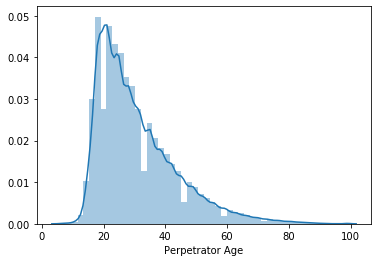

In [9]:
sns.distplot(data2["Perpetrator Age"])

## Step 1: dropping the uknowns and replacing them with truncated normal distribution
    - columns we will be working on (not neccessaraly in that order): 
1. Victim Sex              
2. Victim Age               
3. Victim Race              
4. Victim Ethnicity         
5. Perpetrator Sex         
6. Perpetrator Age          
7. Perpetrator Race         
8. Perpetrator Ethnicity    
9. Relationship             
10. Weapon  

In [47]:
data2["Perpetrator Age"].mode()

0    20
dtype: int64

In [11]:
# Creating our truncated normal distribution of Perpetrator Ages 

# so between age 13 and 99
# mean is 31, stdev is 13 (have to round up to be whole number)
import scipy.stats as stats

# calculate mode and sigma (variance --> rounded we do not want 30.4 year old results)
# we do not need to round mode
mean = data2["Perpetrator Age"].mean().round()
sigma = data2["Perpetrator Age"].std().round()

# shape parameters
# youngest and oldest age 
a, b = 6, 99 

# A truncated normal continuous random variable
# truncated normal distribution is the probability distribution derived from that of a normally 
# distributed random variable by bounding the random variable from either below or above (or both). 
# probability density function is the probability of something happening within certain range / upper bound 
# restricting normal distribution between an interval 
# a - mu --> 13 - 31 range/13, 99-31/13, loc = location parameter (mean), scale parameter = scale (sigma)
# --> so stdev will move up and down based on the mean
dist = stats.truncnorm((a - mean) / sigma, (b - mean) / sigma, loc=mean, scale=sigma)

# generate 218668 random numbers based dist conditions
# our original number of observations - current
# we get a numpy array back
values = dist.rvs(216454).round()
values = values.astype(np.int)

In [19]:
d = pd.Series(values)

In [20]:
data15 = data.copy()

# replace blank strings with zeros
data15['Perpetrator Age'] = data15['Perpetrator Age'].replace(" ", 0)

# format them as integers
data15['Perpetrator Age'] = data15['Perpetrator Age'].astype(str).astype(int)

under = data15["Perpetrator Age"] < 6

# replace them with nan values for that column
data15["Perpetrator Age"][under_6] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data15 = data15["Perpetrator Age"].fillna(d)


# display the df information
# we got rid off 216,454 values
data15.head()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


0    15.0
1    42.0
2    36.0
3    42.0
4    29.0
Name: Perpetrator Age, dtype: float64

In [50]:
#if there is missing --> impute them where missing data is 
#brand new column

SyntaxError: invalid syntax (<ipython-input-50-de8f68ac306c>, line 1)

### creating a copy and getting the results in based on our conditions

In [52]:
# checking our upper age for victims
# age 99 there were 9,281 victims over 35 years
# over that age the value is 0 until we hit that 998 number with 974 observations
# but it appears this error was deleted with our perpetrator age delition
# we have to be careful here as this will give more error for our victim age adjustment 
# it also deleted other ages we care about
# answer get another copy of the data
data2[data2["Victim Age"]==998].count()

Record ID                333
Agency Code              333
Agency Name              333
Agency Type              333
City                     333
State                    333
Year                     333
Month                    333
Incident                 333
Crime Type               333
Crime Solved             333
Victim Sex               333
Victim Age               333
Victim Race              333
Victim Ethnicity         333
Perpetrator Sex          333
Perpetrator Age          333
Perpetrator Race         333
Perpetrator Ethnicity    333
Relationship             333
Weapon                   333
Victim Count             333
Perpetrator Count        333
Record Source            333
dtype: int64

In [17]:
# Check this link to see why we are keeping the young ages:
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2174580/
    
# another copy
data3 = data.copy()

# deliting unreasonably high ages (setting upper limit)
vic_age_limit = data3["Victim Age"] > 99

# replace them with nan values for that column
data3["Victim Age"][vic_age_limit] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data3 = data3.dropna()

# reset the index 
data3 = data3.reset_index(drop=True)

# convert the column back to integers
data3["Victim Age"] = data3["Victim Age"].astype(int)

# display df information
# and we got rid off 974 supper old victims (no pun intended)
# we will leave the ages under 6 here as it is possible compared to perpetrators 
data3.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637480 entries, 0 to 637479
Data columns (total 24 columns):
Record ID                637480 non-null int64
Agency Code              637480 non-null object
Agency Name              637480 non-null object
Agency Type              637480 non-null object
City                     637480 non-null object
State                    637480 non-null object
Year                     637480 non-null int64
Month                    637480 non-null object
Incident                 637480 non-null int64
Crime Type               637480 non-null object
Crime Solved             637480 non-null object
Victim Sex               637480 non-null object
Victim Age               637480 non-null int64
Victim Race              637480 non-null object
Victim Ethnicity         637480 non-null object
Perpetrator Sex          637480 non-null object
Perpetrator Age          637480 non-null object
Perpetrator Race         637480 non-null object
Perpetrator Ethnicity    6374

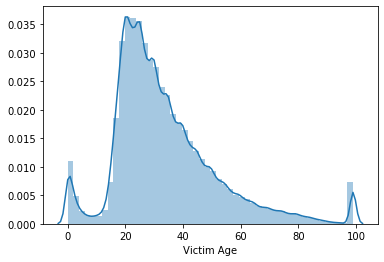

In [20]:
sns.distplot(data3["Victim Age"])

In [54]:
# doing the same for ages to fill the error void
# Note: always have new variables

mean1 = data3["Victim Age"].mean().round()
sigma1 = data3["Victim Age"].std().round()

# shape parameters
# youngest and oldest age 
a1, b1 = 0, 99 

dist1 = stats.truncnorm((a1 - mean1) / sigma1, (b1 - mean1) / sigma1, loc=mean1, scale=sigma1)

# pluck in our error 974 in this case
values1 = dist1.rvs(974).round()

In [ ]:
# check where there is most unsolved murders

## Imputing the ages data

In [ ]:
data40 = data.copy()
data40["Victim Age"]

## If we wish to keep the categorica unknown values we can use this data file  

## Dropping the categorical unknowns 

In [6]:
# Dropping Victim Ethnicity unknowns
# new copy
data4 = data.copy()

# deleting victim ethnicity unknowns
vic_eth_del_unknowns = data4["Victim Ethnicity"] == "Unknown"

# replace them with nan values for that column
data4["Victim Ethnicity"][vic_eth_del_unknowns] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data4 = data4.dropna()

# reset the index 
data4 = data4.reset_index(drop=True)

# display df information
data4.info()



/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0         Not Hispanic
1         Not Hispanic
2         Not Hispanic
3         Not Hispanic
4         Not Hispanic
              ...     
270146    Not Hispanic
270147    Not Hispanic
270148        Hispanic
270149    Not Hispanic
270150    Not Hispanic
Name: Victim Ethnicity, Length: 270151, dtype: object

In [56]:
# Dropping Perpetrator Ethnicity unknowns
# new copy
data5 = data.copy()

# deleting perpetrator ethnicity unknowns
perp_eth_del_unknowns = data5["Perpetrator Ethnicity"] == "Unknown"

# replace them with nan values for that column
data5["Perpetrator Ethnicity"][perp_eth_del_unknowns] = np.nan

data5 = data5.dropna()

# reset the index 
data5 = data5.reset_index(drop=True)

# display df information
data5.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192044 entries, 0 to 192043
Data columns (total 24 columns):
Record ID                192044 non-null int64
Agency Code              192044 non-null object
Agency Name              192044 non-null object
Agency Type              192044 non-null object
City                     192044 non-null object
State                    192044 non-null object
Year                     192044 non-null int64
Month                    192044 non-null object
Incident                 192044 non-null int64
Crime Type               192044 non-null object
Crime Solved             192044 non-null object
Victim Sex               192044 non-null object
Victim Age               192044 non-null int64
Victim Race              192044 non-null object
Victim Ethnicity         192044 non-null object
Perpetrator Sex          192044 non-null object
Perpetrator Age          192044 non-null object
Perpetrator Race         192044 non-null object
Perpetrator Ethnicity    1920

In [58]:
# Dropping relationship unknowns (if only we could)
# new copy
data6 = data.copy()

# deleting relationship unknowns
relat_del_unknowns = data6["Relationship"] == "Unknown"

# replace them with nan values for that column
data6["Relationship"][relat_del_unknowns] = np.nan

data6 = data6.dropna()

# reset the index 
data6 = data6.reset_index(drop=True)

# display df information
data6.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365441 entries, 0 to 365440
Data columns (total 24 columns):
Record ID                365441 non-null int64
Agency Code              365441 non-null object
Agency Name              365441 non-null object
Agency Type              365441 non-null object
City                     365441 non-null object
State                    365441 non-null object
Year                     365441 non-null int64
Month                    365441 non-null object
Incident                 365441 non-null int64
Crime Type               365441 non-null object
Crime Solved             365441 non-null object
Victim Sex               365441 non-null object
Victim Age               365441 non-null int64
Victim Race              365441 non-null object
Victim Ethnicity         365441 non-null object
Perpetrator Sex          365441 non-null object
Perpetrator Age          365441 non-null object
Perpetrator Race         365441 non-null object
Perpetrator Ethnicity    3654

In [59]:
# Dropping Weapon unknowns
# new copy
data7 = data.copy()

# deleting weapon unknowns
weap_del_unknowns = data7["Weapon"] == "Unknown"

# replace them with nan values for that column
data7["Weapon"][weap_del_unknowns] = np.nan

data7 = data7.dropna()

# reset the index 
data7 = data7.reset_index(drop=True)

# display df information
data7.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605262 entries, 0 to 605261
Data columns (total 24 columns):
Record ID                605262 non-null int64
Agency Code              605262 non-null object
Agency Name              605262 non-null object
Agency Type              605262 non-null object
City                     605262 non-null object
State                    605262 non-null object
Year                     605262 non-null int64
Month                    605262 non-null object
Incident                 605262 non-null int64
Crime Type               605262 non-null object
Crime Solved             605262 non-null object
Victim Sex               605262 non-null object
Victim Age               605262 non-null int64
Victim Race              605262 non-null object
Victim Ethnicity         605262 non-null object
Perpetrator Sex          605262 non-null object
Perpetrator Age          605262 non-null object
Perpetrator Race         605262 non-null object
Perpetrator Ethnicity    6052

In [60]:
# Dropping Perpetrator Race unknowns
# new copy
data8 = data.copy()

# deleting perpetrator race unknowns
perp_race_del_unknowns = data8["Perpetrator Race"] == "Unknown"

# replace them with nan values for that column
data8["Perpetrator Race"][perp_race_del_unknowns] = np.nan

data8 = data8.dropna()

# reset the index 
data8 = data8.reset_index(drop=True)

# display df information
data8.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442407 entries, 0 to 442406
Data columns (total 24 columns):
Record ID                442407 non-null int64
Agency Code              442407 non-null object
Agency Name              442407 non-null object
Agency Type              442407 non-null object
City                     442407 non-null object
State                    442407 non-null object
Year                     442407 non-null int64
Month                    442407 non-null object
Incident                 442407 non-null int64
Crime Type               442407 non-null object
Crime Solved             442407 non-null object
Victim Sex               442407 non-null object
Victim Age               442407 non-null int64
Victim Race              442407 non-null object
Victim Ethnicity         442407 non-null object
Perpetrator Sex          442407 non-null object
Perpetrator Age          442407 non-null object
Perpetrator Race         442407 non-null object
Perpetrator Ethnicity    4424

In [61]:
# Dropping Perpetrator Sex unknowns
# new copy
data9 = data.copy()

# deleting perpetrator ethnicity unknowns
perp_sex_del_unknowns = data9["Perpetrator Sex"] == "Unknown"

# replace them with nan values for that column
data9["Perpetrator Sex"][perp_sex_del_unknowns] = np.nan

data9 = data9.dropna()

# reset the index 
data9 = data9.reset_index(drop=True)

# display df information
data9.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448089 entries, 0 to 448088
Data columns (total 24 columns):
Record ID                448089 non-null int64
Agency Code              448089 non-null object
Agency Name              448089 non-null object
Agency Type              448089 non-null object
City                     448089 non-null object
State                    448089 non-null object
Year                     448089 non-null int64
Month                    448089 non-null object
Incident                 448089 non-null int64
Crime Type               448089 non-null object
Crime Solved             448089 non-null object
Victim Sex               448089 non-null object
Victim Age               448089 non-null int64
Victim Race              448089 non-null object
Victim Ethnicity         448089 non-null object
Perpetrator Sex          448089 non-null object
Perpetrator Age          448089 non-null object
Perpetrator Race         448089 non-null object
Perpetrator Ethnicity    4480

In [62]:
# Dropping victim sex unknowns
# new copy
data10 = data.copy()

# deleting victim ethnicity unknowns
vic_sex_del_unknowns = data10["Victim Sex"] == "Unknown"

# replace them with nan values for that column
data10["Victim Sex"][vic_sex_del_unknowns] = np.nan

# drop the na row values (results becomes a float for only that column becasue of numpy)
# results have to be assigned otherwise it doesn't updates
data10 = data10.dropna()

# reset the index 
data10 = data10.reset_index(drop=True)

# display df information
data10.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637470 entries, 0 to 637469
Data columns (total 24 columns):
Record ID                637470 non-null int64
Agency Code              637470 non-null object
Agency Name              637470 non-null object
Agency Type              637470 non-null object
City                     637470 non-null object
State                    637470 non-null object
Year                     637470 non-null int64
Month                    637470 non-null object
Incident                 637470 non-null int64
Crime Type               637470 non-null object
Crime Solved             637470 non-null object
Victim Sex               637470 non-null object
Victim Age               637470 non-null int64
Victim Race              637470 non-null object
Victim Ethnicity         637470 non-null object
Perpetrator Sex          637470 non-null object
Perpetrator Age          637470 non-null object
Perpetrator Race         637470 non-null object
Perpetrator Ethnicity    6374

In [12]:
# Dropping victim race unknowns
# new copy
data11 = data.copy()

# deleting victim race unknowns
vic_sex_del_unknowns = data11["Victim Race"] == "Unknown"

# replace them with nan values for that column
data11["Victim Race"][vic_sex_del_unknowns] = np.nan

data11 = data11.dropna()

# reset the index 
data11 = data11.reset_index(drop=True)

data11["Victim Race"].astype('category')

# display df information
data11.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631778 entries, 0 to 631777
Data columns (total 24 columns):
Record ID                631778 non-null int64
Agency Code              631778 non-null object
Agency Name              631778 non-null object
Agency Type              631778 non-null object
City                     631778 non-null object
State                    631778 non-null object
Year                     631778 non-null int64
Month                    631778 non-null object
Incident                 631778 non-null int64
Crime Type               631778 non-null object
Crime Solved             631778 non-null object
Victim Sex               631778 non-null object
Victim Age               631778 non-null int64
Victim Race              631778 non-null object
Victim Ethnicity         631778 non-null object
Perpetrator Sex          631778 non-null object
Perpetrator Age          631778 non-null object
Perpetrator Race         631778 non-null object
Perpetrator Ethnicity    6317

## Creating new categorical values

In [ ]:
# using individually deleted categorical columns 
# take the mode array of that distribution and create the unknown values based on them
# put them back in 

There is various ways to handle missing values of categorical ways.

1. Ignore observations of missing values if we are dealing with large data sets and less number of records 
    has missing values
2. Ignore variable, if it is not significant
3. Develop model to predict missing values
4. Treat missing data as just another category
5. Asign unique numerical values to the item in the category 
    - and perform truncated normal distribution as above

In [67]:
# A way to generate categorical values would be to assign a unique value to them
# Example: 1 for male, 2 for female 
# then we use the same formula as we did above and generate the required number of missing values 

In [13]:
# Label Encoding 

data11['Victim Race'] = data11['Victim Race'].cat.codes
data11

AttributeError: Can only use .cat accessor with a 'category' dtype

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()
steps = [('imputation', imp),('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                 test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

/home/jupyter-ehren/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


NameError: name 'LogisticRegression' is not defined

### Imputing generated now known categorical values 

## Adding +1 (UPDATE THE VARIABLE WHEN YOU KNOW THE FINAL VERSION

In [36]:
# if we do not add this we will miss not showing many values
# Update this variable when you know the end complete file
data2["Victim Count"] += 1
data2["Victim Count"].unique() 

array([ 1,  3,  2,  4,  7,  6,  5,  8,  9, 10, 11])

In [37]:
# Update this variable when you know the end complete file
data2["Perpetrator Count"] += 1
data2["Perpetrator Count"].unique()

array([ 1,  2,  3,  4,  5,  6,  9, 11,  7, 10,  8])

## Adding all complete values to a master file
1. Here we will add in all the data we created for the unknowns, zeros and upper limit to a master file

# Transforming data for machine learning
1. To get all the unknowns like we did above using machine learning 
    - we can make it a 2 team competition for budget scenario
    - 1 team did the thing above to fill the values the other uses machine learning
    - for that we will have to get rid of all the unknowns to create a unknown free training set
    - thats about 130,000 rows per 24 columns --> divided into training and test data set
    - then convert columns into integers except for the target/label
    - if time permits build a user interface that can be changed and different output comes out
    - so it is not a black box
2. Use machine learning to predict data based on the data we tranformed above
    - if time permits build a user interface that can be changed and different output comes out
    - so it is not a black box

### 1. Deleting all the unknowns 
    - This file will be free of unknows and have much less data 
    - It's also important to note that when we delete unknown rows we will be deleting known variables
    - We need to do this becasue row count has to be identical for machine learning

In [ ]:
# the only copy we will make that will contain only the known values for all
# we use the perpetrator age data set to copy as the 0s were alredy deleted there (data)
# but we still have to delete the victim age as its stored in a different variable
data13 = data2.copy()

# deliting the remaining unreasonably high ages (setting upper limit)
vic_age_limit1 = data13["Victim Age"] > 99
data13["Victim Age"][vic_age_limit1] = np.nan
data13 = data13.dropna()

# reset the index 
data13 = data13.reset_index(drop=True)

# convert the column back to integers
data13["Victim Age"] = data13["Victim Age"].astype(int)

# deleting victim ethnicity unknowns
vic_eth_del_unknowns1 = data13["Victim Ethnicity"] == "Unknown"
data13["Victim Ethnicity"][vic_eth_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting perpetrator ethnicity unknowns
perp_eth_del_unknowns1 = data13["Perpetrator Ethnicity"] == "Unknown"
data13["Perpetrator Ethnicity"][perp_eth_del_unknowns1] = np.nan
data13 = data13.dropna() 
data13 = data13.reset_index(drop=True)

# deleting relationship unknowns
relat_del_unknowns1 = data13["Relationship"] == "Unknown"
data13["Relationship"][relat_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting weapon unknowns
weap_del_unknowns1 = data13["Weapon"] == "Unknown"
data13["Weapon"][weap_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting perpetrator race unknowns
perp_race_del_unknowns1 = data13["Perpetrator Race"] == "Unknown"
data13["Perpetrator Race"][perp_race_del_unknowns1] = np.nan
data13 = data13.dropna() 
data13 = data13.reset_index(drop=True)

# deleting perpetrator ethnicity unknowns
perp_sex_del_unknowns1 = data13["Perpetrator Sex"] == "Unknown"
data13["Perpetrator Sex"][perp_sex_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# deleting victim ethnicity unknowns
vic_sex_del_unknowns1 = data13["Victim Sex"] == "Unknown"
data13["Victim Sex"][vic_sex_del_unknowns1] = np.nan
data13 = data13.dropna() 
data13 = data13.reset_index(drop=True)

# deleting victim race unknowns
vic_sex_del_unknowns1 = data13["Victim Race"] == "Unknown"
data13["Victim Race"][vic_sex_del_unknowns1] = np.nan
data13 = data13.dropna()
data13 = data13.reset_index(drop=True)

# Adding +1
data13["Victim Count"] += 1
data13["Victim Count"].unique()

# adding +1
data13["Perpetrator Count"] += 1
data13["Perpetrator Count"].unique()

# display df information
data13.info()

In [ ]:
# Proof that there are no more unknowns
# We end up with 151,172 observations to work with

In [ ]:
data13["Victim Age"].unique()

In [ ]:
data13["Victim Ethnicity"].unique()

In [ ]:
data13["Victim Race"].unique()

In [ ]:
data13["Perpetrator Ethnicity"].unique()

In [ ]:
data13["Perpetrator Race"].unique()

In [ ]:
data13["Perpetrator Age"].unique()

In [ ]:
data13["Perpetrator Sex"].unique()

In [ ]:
data13["Weapon"].unique()

In [ ]:
data13["Relationship"].unique()

In [45]:
state_pop = pd.read_csv('statepop2014.csv')
state_pop.head()

,State,Population
0,Alabama,4842481
1,Alaska,736307
2,Arizona,6733840
3,Arkansas,2967726
4,California,38625139


In [69]:
data_2014 = data2[data2["Year"]==2014]
data_2014 = data_2014.reset_index()
data_2014 = data_2014.groupby("State")["Victim Count"].agg("sum")
d = pd.DataFrame(data_2014)
d = d.reset_index()
d["Population"] = state_pop["Population"]
d["100,000"] = (d["Population"]/100000)
d["Per Capita Murder"] = (d["Victim Count"]/d["100,000"]).round(2)
d = d.sort_values(by=['Per Capita Murder'])

,State,Victim Count,Population,"100,000",Per Capita Murder
0,Alabama,1,4842481,48.42481,0.02
11,Hawaii,13,1414862,14.14862,0.92
21,Massachusetts,69,6763652,67.63652,1.02
13,Illinois,163,12888962,128.88962,1.26
29,New Hampshire,17,1333223,13.33223,1.28
23,Minnesota,84,5451522,54.51522,1.54
37,Oregon,65,3964106,39.64106,1.64
6,Connecticut,67,3594783,35.94783,1.86
39,Rhodes Island,20,1056017,10.56017,1.89
34,North Dakota,15,737382,7.37382,2.03


In [81]:
d2 = data.groupby("Year")["Victim Count"].agg("sum")

Year
1980    2410
1981    2118
1982    2692
1983    1950
1984    2110
1985    2048
1986    2082
1987    2090
1988    1886
1989    2062
1990    2664
1991    2224
1992    2608
1993    2686
1994    2440
1995    3872
1996    1880
1997    2132
1998    1670
1999    1984
2000    1752
2001    1870
2002    2214
2003    2568
2004    2156
2005    2184
2006    2343
2007    2420
2008    2191
2009    2389
2010    2044
2011    2153
2012    2510
2013    2276
2014    2065
Name: Victim Count, dtype: int64

In [85]:
df = pd.DataFrame(d2)
df = df.reset_index()
df["pct"] = df["Victim Count"].pct_change()*100
df

,Year,Victim Count,pct
0,1980,2410,NaN
1,1981,2118,-12.116183
2,1982,2692,27.101039
3,1983,1950,-27.563150
4,1984,2110,8.205128
5,1985,2048,-2.938389
6,1986,2082,1.660156
7,1987,2090,0.384246
8,1988,1886,-9.760766
9,1989,2062,9.331919
